# Dashboards

In [1]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import pygeos as pyg
import sys
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from matplotlib.lines import Line2D

sys.path.append("../scripts")
from utils import *
from Europe_utils import *

config = load_config(file='config.json')
config

{'comment': 'This json file contains the paths to the directories where the in- and output files are located',
 'paths': {'data': WindowsPath('D:/Python/europe_flood_road_disruption/data'),
  'output_data': WindowsPath('D:/Python/europe_flood_road_disruption/data/output'),
  'output_images': WindowsPath('D:/Python/europe_flood_road_disruption/visualisations'),
  'NUTS_shapes': WindowsPath('D:/Europe_trade_disruptions/NUTS-2_shapes/NUTS_2016'),
  'graphs_folder': WindowsPath('D:/Europe_percolation/trails_networks'),
  'preproc_output': WindowsPath('D:/Europe_percolation/preproc_output'),
  'main_output': WindowsPath('D:/Europe_percolation/main_output'),
  'logs': WindowsPath('D:/Python/europe_flood_road_disruption/logs')}}

In [2]:
from visualisations_new import aggregate_results_step1, aggregate_results_step2, percolation_summary

In [3]:
from visualisations_new import main
df,df_abs,df_rel = main(config)

perc_overview = percolation_summary(df)
perc_overview
#perc_overview.to_csv('Completeness_14-5-2021.csv',sep=';')

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'experiment', 'disrupted', 'no detour',
       'avg extra time', 'AoI removed', 'OD-disrupted', 'OD-with_detour',
       'with_detour_extra_times', 'edges_in_graph', 'edges_in_giant',
       'country'],
      dtype='object')
Available for 30 countries
Grouping per AoI-country combination
 -------- main() finished --------


,AoIs,Reps_unique,Mode_reps,Frequency_mode_reps
Albania,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[176, 200, 1]",200,21
Austria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[495, 200, 1]",200,24
Belgium,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[183, 200, 1]",200,22
Bulgaria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[565, 200, 1]",200,26
Croatia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[374, 200, 1]",200,22
Czechia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[425, 200, 1]",200,23
Denmark,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[75, 200, 1]",200,16
Estonia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[139, 200, 1]",200,19
Finland,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[1585, 200, 1]",200,32
France,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[3124, 200, 1]",200,34


### Load required input data

In [4]:
def NUTS_up(N3):
    """Return the corresponding NUTS-2 code for a NUTS-3 code. 
    """
    return N3[:-1]

#LOAD NUTS DATA
N3_path = config['paths']['NUTS_shapes'] / 'NUTS_RG_01M_2016_3035_LEVL_3.shp'
N3 = gpd.read_file(N3_path)
N3 = N3.loc[~N3["NUTS_ID"].isin(NUTS_3_remote())] #Remote overseas territories
N3 = N3.loc[~(N3["CNTR_CODE"] == "TR")] #Remove Turkey
#N3 = N3.to_crs("epsg:4326")

N2_path = config['paths']['NUTS_shapes'] / 'NUTS_RG_01M_2016_3035_LEVL_2.shp'
N2 = gpd.read_file(N2_path)
N2 = N2.loc[~(N2["CNTR_CODE"] == "TR")] #Remove Turkey
NUTS_2_remote = list(set([NUTS_up(N3) for N3 in NUTS_3_remote()]))
N2 = N2.loc[~N2['NUTS_ID'].isin(NUTS_2_remote)]
#N2.plot()

graphs_folder = config['paths']['graphs_folder']

In [5]:
#Load centroids of NUTS-2 and NUTS-3 regions (made in the preprocessing scripts)
centroids_n2 = config['paths']['data'] / 'europe_nuts2_centroids.feather'
centroids_n3 = config['paths']['data'] / 'europe_nuts3_centroids.feather'
assert (centroids_n2.exists() and centroids_n3.exists())

#Process and filter NUTS-3 regions
centroids_n3 =pd.read_feather(centroids_n3)
centroids_n3['geometry'] = centroids_n3['geometry'].apply(wkt.loads)
centroids_n3 = gpd.GeoDataFrame(centroids_n3)
centroids_n3.crs = 'epsg:4326'
centroids_n3 = centroids_n3.to_crs('epsg:3035')
centroids_n3 = centroids_n3.loc[~centroids_n3["NUTS_ID"].isin(NUTS_3_remote())]
centroids_n3 = centroids_n3.loc[~(centroids_n3["CNTR_CODE"] == "TR")]
#centroids_n3.plot()

#Process and filter NUTS-2 regions
centroids_n2 =pd.read_feather(centroids_n2)
centroids_n2['geometry'] = centroids_n2['geometry'].apply(wkt.loads)
centroids_n2 = gpd.GeoDataFrame(centroids_n2)
centroids_n2.crs = 'epsg:4326'
centroids_n2 = centroids_n2.to_crs('epsg:3035')
centroids_n2 = centroids_n2.loc[~centroids_n2["NUTS_ID"].isin(NUTS_2_remote)]
centroids_n2 = centroids_n2.loc[~(centroids_n2["CNTR_CODE"] == "TR")]
#centroids_n2.plot()    

### Load and process raw percolation results

In [8]:
import visualisations_new as vis
#LOAD RESULTS OF THE PERCOLATION: DISRUPTED ROUTES
df,df_abs,df_rel = vis.main(config)
df.head(n=2)

#LOAD AND PROCESS NO DETOUR RESULTS
no_dt_abs, no_dt_rel = vis.process_no_detour(df)

#LOAD AND PROCESS EXTRA TIME VISUALISATIONS - averaged over trips
extra_time_abs,extra_time_rel = vis.process_extra_time(df)

#LOAD AND PROCESS TOTAL EXTRA TRAVEL TIME RESULTS - sum of all trips
#df_totaltraveltime = vis.calculate_total_extra_time(df)
#sum_extra_time_abs,sum_extra_time_rel = vis.process_total_extra_time(df_totaltraveltime)

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'experiment', 'disrupted', 'no detour',
       'avg extra time', 'AoI removed', 'OD-disrupted', 'OD-with_detour',
       'with_detour_extra_times', 'edges_in_graph', 'edges_in_giant',
       'country'],
      dtype='object')
Available for 30 countries
Grouping per AoI-country combination
 -------- main() finished --------
 -------- Process_no_detour() finished --------
 -------- pocess_extra_time() finished --------


NameError: name 'calculate_total_extra_time' is not defined

In [10]:
all_countries = df['country'].unique()
all_countries

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Macedonia',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United kingdom'], dtype=object)

### Load the group lists

In [11]:
groups_file = config['paths']['data'] / 'groups' / '6groupsof6_byactivesize.json'
assert groups_file.exists()
with open(groups_file,'rb') as f:
     groups = json.load(f)
print(groups['info'])
groups = groups['groups']
print(groups)

6 groups of 5 countries; sorted by country area size, only including -active- area (NUTS-3 which centroid is connected to main graph)
{'0': ['SI', 'MK', 'AL', 'BE', 'NL'], '1': ['CH', 'DK', 'EE', 'SK', 'HR'], '2': ['LV', 'LT', 'IE', 'RS', 'CZ'], '3': ['AT', 'PT', 'HU', 'BG', 'EL'], '4': ['UK', 'RO', 'IT', 'PL', 'NO'], '5': ['FI', 'DE', 'SE', 'ES', 'FR']}


In [12]:
### Load some very specific utils for this script, to reduce the lenght of this ipynb
from dashboard_utils import *

In [13]:
config = load_config(file='config.json')
config

{'comment': 'This json file contains the paths to the directories where the in- and output files are located',
 'paths': {'data': WindowsPath('D:/Python/europe_flood_road_disruption/data'),
  'output_data': WindowsPath('D:/Python/europe_flood_road_disruption/data/output'),
  'output_images': WindowsPath('D:/Python/europe_flood_road_disruption/visualisations'),
  'NUTS_shapes': WindowsPath('D:/Europe_trade_disruptions/NUTS-2_shapes/NUTS_2016'),
  'graphs_folder': WindowsPath('D:/Europe_percolation/trails_networks'),
  'preproc_output': WindowsPath('D:/Europe_percolation/preproc_output'),
  'main_output': WindowsPath('D:/Europe_percolation/main_output'),
  'logs': WindowsPath('D:/Python/europe_flood_road_disruption/logs')}}

In [14]:
#list of countries in the right order
#Figure number is index + 1
country_order = []
for cs in groups: 
    country_order.extend(groups[cs])
#country_order

### Color settings for plot

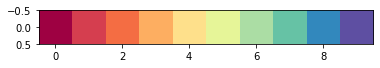

In [15]:
colors = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
roads_cc = colors[0:5][::-1] #We iterate over the roads in reversed order
roads_lw_cc = [1,0.7,0.5,.3,.3][::-1] #linewidth cycler
nuts_fill = '#abdda4'
nuts_border = '#66c2a5'

length_cols = ['Total_Edge_Length', 'Len_Motorway', 'Len_Trunk', 'Len_Primary', 'Len_Secondary', 'Len_Tertiary']

road_types = ['motorway','trunk','primary','secondary','tertiary']

plt.imshow(to_rgba_array(colors).reshape(1,len(colors),4))
plt.show()

newgrey = '#969696'

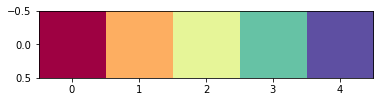

In [16]:
#5 contrasting colors
c = [j for j in colors]
color_5 = [c[0],c[3],c[5],c[7],c[9]]
plt.imshow(to_rgba_array(color_5).reshape(1,len(color_5),4))
plt.show()

In [17]:
import matplotlib as mpl

font = {'family' : 'arial'}
mpl.rc('font', **font)  # pass in the font dict as kwargs
grey = '#444444'
mpl.rcParams.update({'text.color' : grey,
                     'axes.labelcolor' : grey,
                     'axes.titlecolor' : grey,
                     'axes.edgecolor' : grey,
                     'xtick.color': grey, #This is the color of the categories on y- and x-axis
                     'ytick.color': grey                    })

### Creating one dashboard

In [18]:
n2_analysis = ['BE','NL','DE','UK','IT'] #List of countries for which analysis is done on NUTS-2 level instead of NUTS-3 level

Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for AL finished


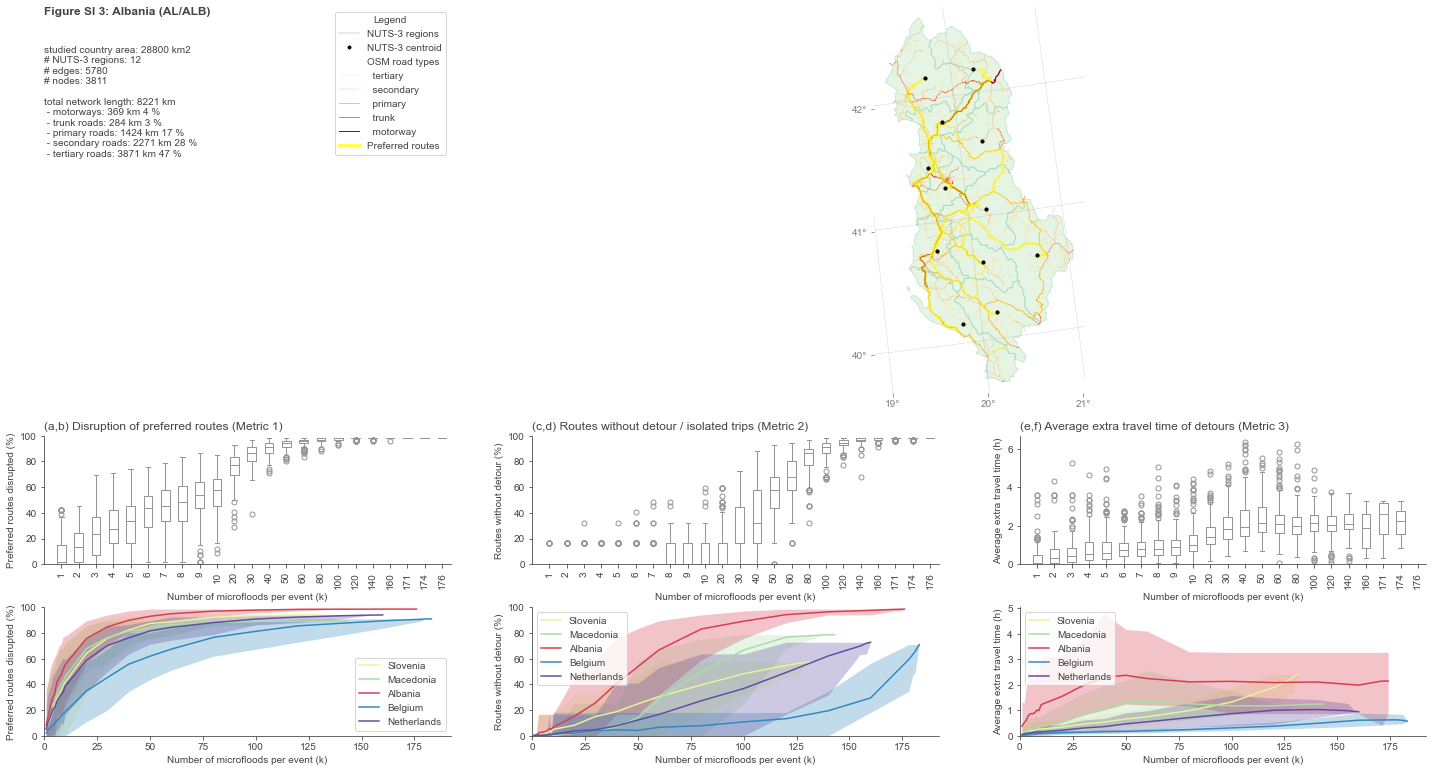

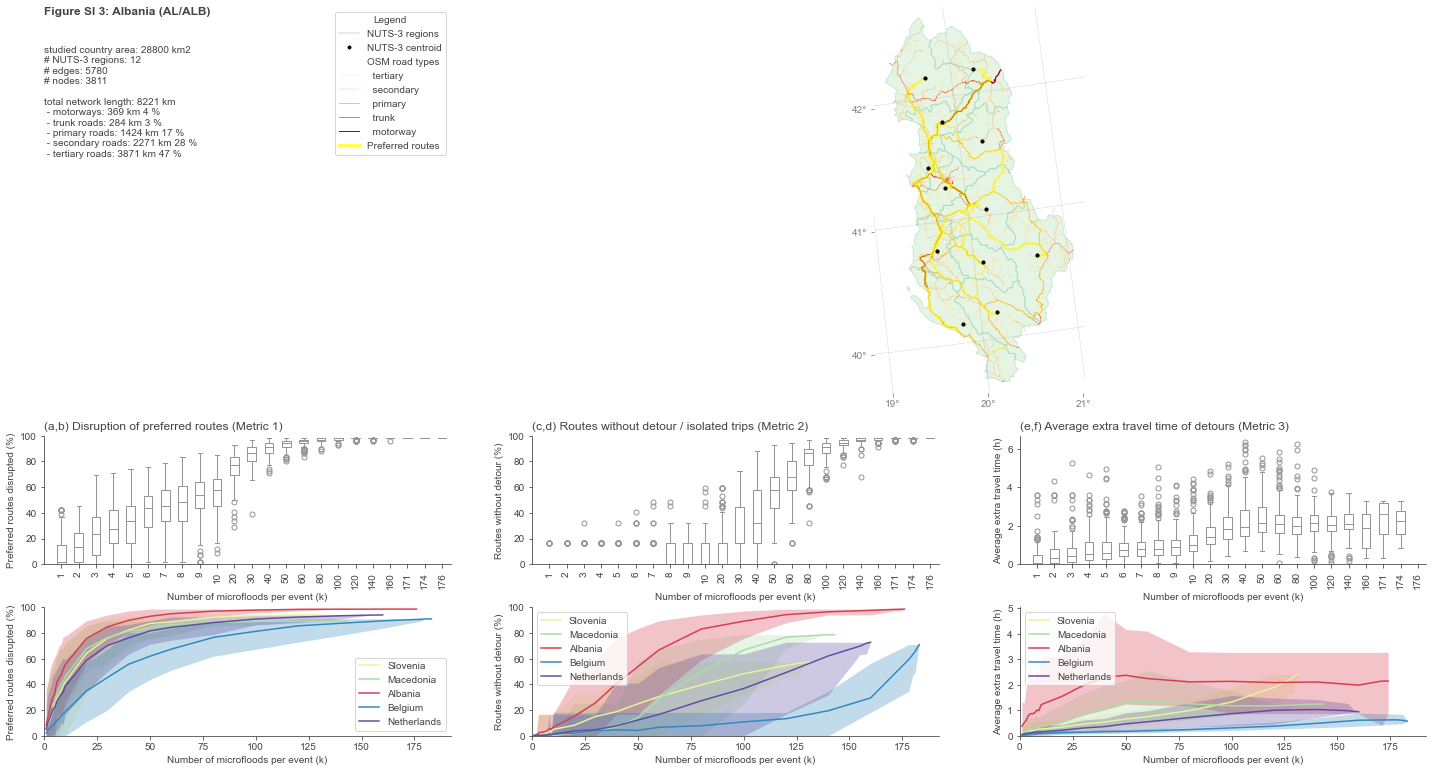

In [24]:
# c = 'AL'
# save_pdf=False,
# save_png=False
# fb=('q_05','q_95')
# if True:
def create_dashboard(c,save_pdf=False,save_png=False,fb=('q_05','q_95')):
    """
    Create dashboard for a country
    
    Arguments:
        *c* (string) : NUTS0-code of country, e.g. 'AT'
        *save_pdf* (Boolean) : indicate if fig should be saved in dashboards/... as pdf file
        *save_png* (Boolean) : indicate if fig should be saved in dashboards/... as png file
        *fb* (tuple) : fill_between setting for the aggregated lineplots, e.g. ('q_05','q_95')
    
    """
    fig = plt.figure(figsize=(1.5*16,1.5*9))


    nrows=3
    ncols=3
    hr = [3,1,1]

    grid = plt.GridSpec(nrows=nrows,ncols=ncols, wspace = .2, hspace = .2, figure=fig, height_ratios=hr)

    ax00 = fig.add_subplot(grid[0, 1:3])
    ax03 = fig.add_subplot(grid[0, 0])
    ax10 = fig.add_subplot(grid[1, 0])
    ax11 = fig.add_subplot(grid[1, 1])
    ax12 = fig.add_subplot(grid[1, 2])
    ax20 = fig.add_subplot(grid[2, 0])
    ax21 = fig.add_subplot(grid[2, 1])
    ax22 = fig.add_subplot(grid[2, 2])
    
    #### Prepare empty legend handles ####
    handles00 = []
    
    

    
    ######################################## TOP PANEL (MAP top right): ax00 ###############################################
    
    nutslevel = 'n3' #n3 or n2
    if c in n2_analysis: nutslevel = 'n2'
        
    if nutslevel == 'n3': long_nutslevel = 'nuts3'
    if nutslevel == 'n2': long_nutslevel = 'nuts2'
    
    if nutslevel == 'n3':
        print('Making NUTS-3 plot')
        #PLOT AREA
        N3_sel = N3.loc[(N3["CNTR_CODE"] == c)]
        N3_sel_active = N3_sel[~N3_sel['NUTS_ID'].isin(NUTS_3_islands())]
        N3_sel_active.plot(ax=ax00,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)
        N3_sel_inactive = N3_sel[N3_sel['NUTS_ID'].isin(NUTS_3_islands())]
        N3_sel_inactive.plot(ax=ax00,facecolor='grey',alpha=0.3,edgecolor='grey')
        
        #Plot centroids
        centroids_n3_sel = centroids_n3[~centroids_n3['NUTS_ID'].isin(NUTS_3_islands())]
        centroids_n3_sel.loc[centroids_n3_sel['CNTR_CODE'] == c].plot(ax=ax00,color='black',markersize=10,zorder=5)
        
        handles00.append(Line2D([0], [0], color=nuts_border, label='NUTS-3 regions',linestyle='-',alpha=0.3))   
        handles00.append(Line2D([0], [0], marker='o', color='w', label='NUTS-3 centroid', markerfacecolor='black', markersize=5))
        
    elif nutslevel == 'n2':
        print('Making NUTS-2 plot')
        #PLOT AREA
        N2_sel = N2.loc[(N2["CNTR_CODE"] == c)]
        NUTS_2_islands = list(set([NUTS_up(N3) for N3 in NUTS_3_islands()]))
        if c == 'UK': NUTS_2_islands.remove('UKM6') #workaround for the UK
        N2_sel_active = N2_sel[~N2_sel['NUTS_ID'].isin(NUTS_2_islands)]
        N2_sel_active.plot(ax=ax00,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)
        N2_sel_inactive = N2_sel[N2_sel['NUTS_ID'].isin(NUTS_2_islands)]
        N2_sel_inactive.plot(ax=ax00,facecolor='grey',alpha=0.3,edgecolor='grey')
        
        #Plot centroids
        #Todo: gives an error
        centroids_n2_sel = centroids_n2[~centroids_n2['NUTS_ID'].isin(NUTS_2_islands)]
        centroids_n2_sel.loc[centroids_n2_sel['CNTR_CODE'] == c].plot(ax=ax00,color='black',markersize=10,zorder=5)
        
        handles00.append(Line2D([0], [0], color=nuts_border, label='NUTS-2 regions',linestyle='-',alpha=0.3))
        handles00.append(Line2D([0], [0], marker='o', color='w', label='NUTS-2 centroid', markerfacecolor='black', markersize=5))
    
    if True:
        #PLOT NETWORK
        L3 = N0_to_3L(c)
        edges_file = graphs_folder / '{}-edges.feather'.format(L3)
        #assert c,edges_file.exists()
        network = pd.read_feather(edges_file)
        network['geoms'] = pyg.io.to_wkt(
            pyg.from_wkb(network.geometry))  # see if this should be activated with the new feather files
        network['geoms'] = network['geoms'].apply(wkt.loads)
        network.drop('geometry', axis=1, inplace=True)
        network.rename(columns={'geoms': 'geometry'}, inplace=True)
        network['highway_mapped'] = network['highway'].map(highway_mapper())
        
        if True:
            handles00.append(Line2D([0], [0], label='OSM road types',alpha=0))
            for r,road_type in enumerate(road_types[::-1]):
                ns = network.loc[network['highway_mapped'] == road_type]
                ns = gpd.GeoDataFrame(ns)
                ns.plot(color=roads_cc[r],ax=ax00,linewidth=roads_lw_cc[r])
                handles00.append(Line2D([0], [0], color=roads_cc[r], label='  ' + road_type,linestyle='-',linewidth=roads_lw_cc[r]))
    
    #ADD SHADING ON TOP OF THE ROUTES THAT ARE USED IN PREFERRED ROUTES BETWEEN OD-PAIRS
    #Todo: move to more appropriate location
    #optimal_routes = config['paths']['preproc_output']  / 'optimal_routes_time_{}.feather'.format(country_names(c).lower())
    country_name = country_names(c).lower()
    
    optimal_routes = config['paths']['preproc_output']  / '{}/optimal_routes_time_{}_{}.feather'.format(country_name,country_name,long_nutslevel)
    #assert optimal_routes.exists()
    optimal_routes =pd.read_feather(optimal_routes)
    
    counter, to_plot = edge_count_optimal_routes(optimal_routes)
    for key in to_plot.keys():
        #key = 10 #plot edges used by n routes
        if max(to_plot.keys()) > 100: #smaller lines in case of many routes
            lw = 0.5 + 0.05 *key
        else: 
            lw = 0.5 + 0.2 *key
        sn = network.loc[network['id'].isin(to_plot[key])]
        sn = gpd.GeoDataFrame(sn)
        sn.plot(ax=ax00,color='yellow',linewidth=lw,alpha=0.5)
    handles00.append(Line2D([0], [0], color='yellow', label='Preferred routes',linestyle='-', lw=3,alpha=.7)) 
    
   
    ######################################## DATA PANEL top left (was right, therefore names ax03) ###############################################
    #GET THE INFO FOR THE TEXT PANEL
    ### Load dashboard statistics
    graph_stats_folder = config['paths']['data'] / 'graph_stats' / 'version2'
    with open(graph_stats_folder / (c+'.json')) as f:
        c_stats = json.load(f)

    #WRITE SOME TEXT 
    fignumber = country_order.index(c) + 1
    header = 'Figure SI {}: {} ({}/{})'.format(fignumber,country_names(c),c,N0_to_3L(c))
    ax03.text(x=0,y=1,s=header,fontweight='bold',transform=ax03.transAxes,ha='left',va='top',fontsize='large')

    if nutslevel == 'n3': 
        nr_nuts = centroids_n3_sel.loc[centroids_n3_sel['CNTR_CODE'] == c].shape[0]
        nuts_label = '# NUTS-3 regions: '
    elif nutslevel == 'n2' : 
        nr_nuts = centroids_n2_sel.loc[centroids_n2_sel['CNTR_CODE'] == c].shape[0]
        nuts_label = '# NUTS-2 regions: '
    
    s = ""
    s+= 'studied country area: {} km2 \n'.format(c_stats['active_country_area_km2'])
    s+= nuts_label + str(nr_nuts) + '\n'
    s+= '# edges: {} \n'.format(c_stats['Edge_No'])
    s+= '# nodes: {} \n'.format(c_stats['Node_No'])
    s+= '\n'
    s+= 'total network length: {} km \n'.format(c_stats['Len_tot__km'])
    s+= ' - motorways: {} km {} % \n'.format(c_stats['Len_Motorway'],int(round((100*c_stats['Len_Motorway']/c_stats['Len_tot__km']),0)))
    s+= ' - trunk roads: {} km {} % \n'.format(c_stats['Len_Trunk'],int(round((100*c_stats['Len_Trunk']/c_stats['Len_tot__km']),0)))
    s+= ' - primary roads: {} km {} % \n'.format(c_stats['Len_Primary'],int(round((100*c_stats['Len_Primary']/c_stats['Len_tot__km']),0)))
    s+= ' - secondary roads: {} km {} % \n'.format(c_stats['Len_Secondary'],int(round((100*c_stats['Len_Secondary']/c_stats['Len_tot__km']),0)))
    s+= ' - tertiary roads: {} km {} % \n'.format(c_stats['Len_Tertiary'],int(round((100*c_stats['Len_Tertiary']/c_stats['Len_tot__km']),0)))
    
    ax03.text(x=0,y=0.9,s=s,transform=ax03.transAxes,ha='left',va='top')
        
    

    ##### WRITE THE RESULTS OF THE PERCOLATION ANALYSIS ####
    #WRITE PERCOLATION RESULTS
    c_name = country_names(c)
    if c_name == 'United Kingdom': c_name = 'United kingdom'

    #Find group that c is in
    group_nr_sel = None
    for group_nr, members in groups.items():
        if c in members:
            group_nr_sel = group_nr
    
    #Set colors for aggregated lineplots
    group_members = groups[group_nr_sel]
    group_members_fullnames = [country_names(x) for x in group_members]
    
    index_in_list =  group_members.index(c)
    plot_colors = colors[5::]
    plot_colors[index_in_list] = colors[1] #Make country of this dashboard red
    
    #### BOXPLOTS
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, markeredgecolor=newgrey)
    
    fig, ax10 = vis.boxplot_one_country(df,c_name,fig=fig,ax=ax10,color=newgrey,flierprops=flierprops)
    fig, ax20 = vis.aggregated_lineplot_new(df_abs,group_members_fullnames,fig=fig,ax=ax20,fill_between=fb,clrs=plot_colors)
    ax10.set_title(None)
    ax10.set_title('(a,b) Disruption of preferred routes (Metric 1)',loc='left')

    
    fig, ax11 = vis.no_detour_boxplot(df,c_name,save=False,fig=fig,ax=ax11,color=newgrey,flierprops=flierprops)
    fig, ax21 = vis.no_detour_aggregated_lineplot(no_dt_abs,group_members_fullnames,fig=fig,ax=ax21,fill_between=fb,clrs=plot_colors)
    ax11.set_title(None)
    ax11.set_title('(c,d) Routes without detour / isolated trips (Metric 2)',loc='left')

    #Extra time boxplots
    fig, ax12 = vis.extra_time_boxplot(df,c_name,unit='hr',save=False,fig=fig, ax=ax12,color=newgrey,flierprops=flierprops)
    fig, ax22 = vis.extra_time_aggregated_lineplot(extra_time_abs, group_members_fullnames, fill_between=fb, fig=fig,ax=ax22,clrs=plot_colors)
    ax12.set_title(None)
    ax12.set_title('(e,f) Average extra travel time of detours (Metric 3)',loc='left')
    
    for ax in [ax10,ax11,ax12,ax20,ax21,ax22]:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.set_xlim(0,None)
        
    ax10.set_xlabel('Number of microfloods per event (k)')
    ax10.set_ylabel('Preferred routes disrupted (%)')
    ax20.set_xlabel('Number of microfloods per event (k)')
    ax20.set_ylabel('Preferred routes disrupted (%)')
    
    ax11.set_xlabel('Number of microfloods per event (k)')
    ax11.set_ylabel('Routes without detour (%)')
    ax21.set_xlabel('Number of microfloods per event (k)')
    ax21.set_ylabel('Routes without detour (%)')
    
    ax12.set_xlabel('Number of microfloods per event (k)')
    ax12.set_ylabel('Average extra travel time (h)')
    ax22.set_xlabel('Number of microfloods per event (k)')
    ax22.set_ylabel('Average extra travel time (h)')

    for ax in [ax10,ax20,ax11,ax21]:
        ax.set_ylim(0,100)
        
    for ax in [ax12,ax22]:
        ax.set_ylim(0,None)
    
    rotate = True
    if rotate:
        for ax in [ax10,ax11,ax12]:
            for tick in ax.get_xticklabels():
                tick.set_rotation(90)
    
    for spine in ax03.spines.values(): spine.set_visible(False)
    ax03.axes.xaxis.set_visible(False)
    ax03.axes.yaxis.set_visible(False)

    #fig.suptitle(t='{} ({}/{})'.format(country_names(c),c,N0_to_3L(c))) #Supress text
    fig.suptitle(t=None)
    
    
    #### Add legend
    ax03.legend(handles=handles00,title='Legend',loc='best')

    ### Add gridlines
    if nutslevel == 'n3':
        ax00 = add_grid(ax00,N3_sel)
    
    elif nutslevel == 'n2':
        ax00 = add_grid(ax00,N2_sel)
        
    #Create nicer-xticks
    ax00 = set_x_ticks_at_whole_degrees(ax00,color='grey')
    
    #Remove spines around main panel
    [s.set_visible(False) for s in ax00.spines.values()]
    
    print('dashboard for {} finished'.format(c))
    
    if save_pdf: 
        fig.savefig('dashboards/{}.pdf'.format(c),bbox_inches='tight',dpi=500)
        print('pdf dashboard for {} saved'.format(c))
    if save_png: 
        fig.savefig('dashboards/{}.png'.format(c),bbox_inches='tight',dpi=400)
        print('png dashboard for {} saved'.format(c))
    return fig
    
create_dashboard('AL',save_pdf=False,save_png=False,fb=('q_05','q_95'))

In [26]:
for c in country_order:
    print(c)
    try:
        create_dashboard(c,save_pdf=True,save_png=True)
        plt.close('all')
    except Exception as e:
        print('-'*30)
        print(c,e)
        print('-'*30)

SI
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for SI finished
pdf dashboard for SI saved
png dashboard for SI saved
MK
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for MK finished
pdf dashboard for MK saved
png dashboard for MK saved
AL
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for AL finished
pdf dashboard for AL saved
png dashboard for AL saved
BE
Making NUTS-2 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for BE finished
pdf dashboard for BE saved
png dashboard for BE saved
NL
Making NUTS-2 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for NL finished
pdf dashboard for NL saved
png dashboard for NL saved
CH
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for CH finished
pdf dashboard for CH saved
png dashboard for CH saved
DK
Making NUTS-3 plot
dashboard for DK finished
pdf dashboard for DK saved
png dashboard for DK saved
EE
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for EE finished
pdf dashboard for EE saved
png dashboard for EE saved
SK
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for SK finished
pdf dashboard for SK saved
png dashboard for SK saved
HR
Making NUTS-3 plot
dashboard for HR finished
pdf dashboard for HR saved
png dashboard for HR saved
LV
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for LV finished
pdf dashboard for LV saved
png dashboard for LV saved
LT
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for LT finished
pdf dashboard for LT saved
png dashboard for LT saved
IE
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for IE finished
pdf dashboard for IE saved
png dashboard for IE saved
RS
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for RS finished
pdf dashboard for RS saved
png dashboard for RS saved
CZ
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for CZ finished
pdf dashboard for CZ saved
png dashboard for CZ saved
AT
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for AT finished
pdf dashboard for AT saved
png dashboard for AT saved
PT
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for PT finished
pdf dashboard for PT saved
png dashboard for PT saved
HU
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for HU finished
pdf dashboard for HU saved
png dashboard for HU saved
BG
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for BG finished
pdf dashboard for BG saved
png dashboard for BG saved
EL
Making NUTS-3 plot
dashboard for EL finished
pdf dashboard for EL saved
png dashboard for EL saved
UK
Making NUTS-2 plot
dashboard for UK finished
pdf dashboard for UK saved
png dashboard for UK saved
RO
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for RO finished
pdf dashboard for RO saved
png dashboard for RO saved
IT
Making NUTS-2 plot
dashboard for IT finished
pdf dashboard for IT saved
png dashboard for IT saved
PL
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for PL finished
pdf dashboard for PL saved
png dashboard for PL saved
NO
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for NO finished
pdf dashboard for NO saved
png dashboard for NO saved
FI
Making NUTS-3 plot
dashboard for FI finished
pdf dashboard for FI saved
png dashboard for FI saved
DE
Making NUTS-2 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


dashboard for DE finished
pdf dashboard for DE saved
png dashboard for DE saved
SE
Making NUTS-3 plot
dashboard for SE finished
pdf dashboard for SE saved
png dashboard for SE saved
ES
Making NUTS-3 plot
dashboard for ES finished
pdf dashboard for ES saved
png dashboard for ES saved
FR
Making NUTS-3 plot
dashboard for FR finished
pdf dashboard for FR saved
png dashboard for FR saved
